In [25]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import wave as wave
from scipy import signal
import struct

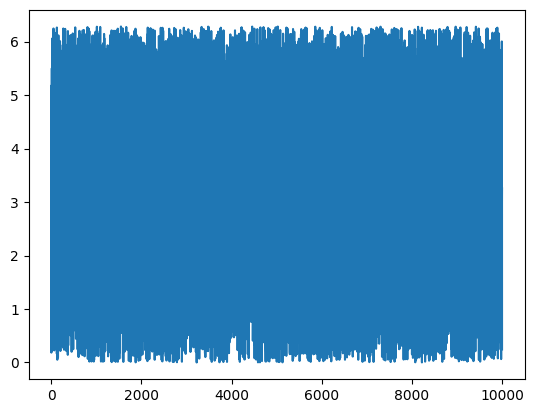

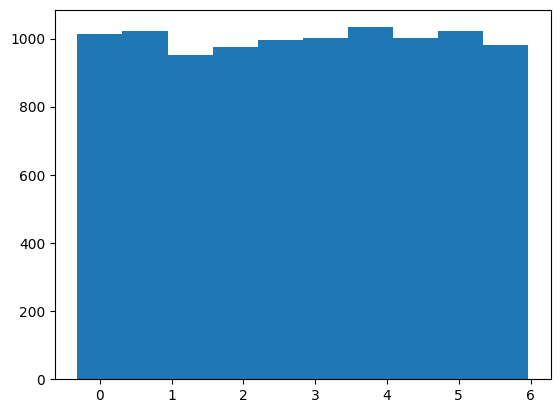

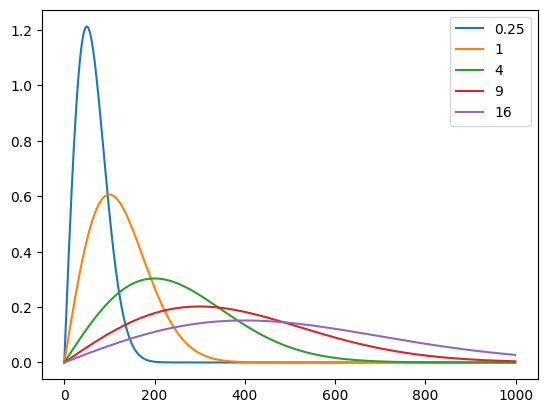

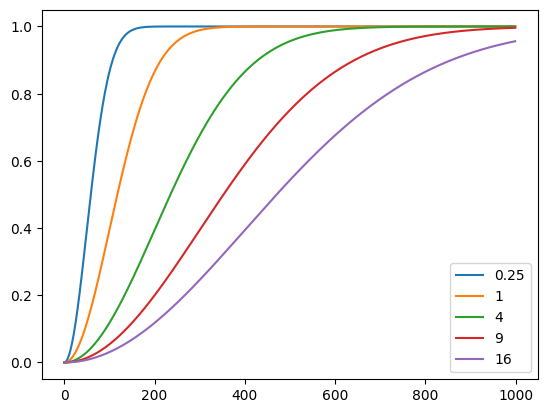

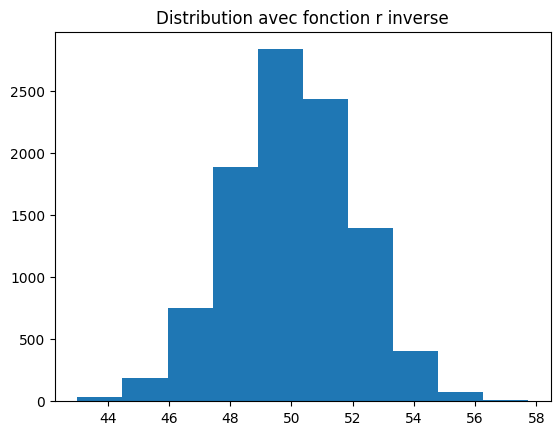

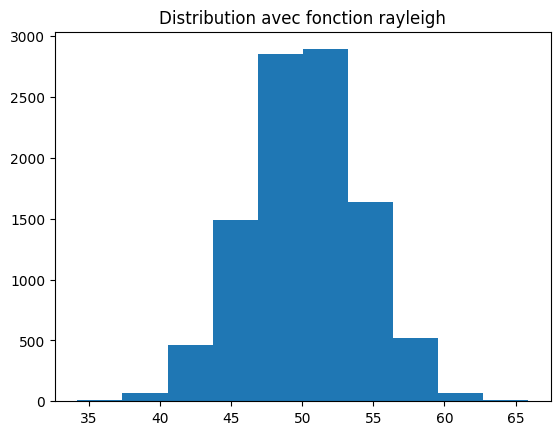

In [40]:
#1 a)
N= 10000
u1 = np.random.rand(N)
u2 = np.random.rand(N)
theta = u2*2*np.pi

plt.plot(theta)
plt.show()

#1 b)
# counts, bins = np.histogram(theta)
counts, bins = np.histogram(theta)
plt.hist(theta,align="left",bins=bins)
plt.show()
#1 c)
sigma2 = [0.25,1,4,9,16]
for i in range(len(sigma2)):
    rayleigh = [0 if r<=0 else (r/sigma2[i])*np.exp(-(r**2)/(2*sigma2[i])) for r in np.linspace(0,10,1000)]
    plt.plot(rayleigh)
plt.legend(sigma2)
plt.show()
#1 d)
for i in range(len(sigma2)):
    Fr= [1-1*np.exp(-(r**2)/(2*sigma2[i])) for r in np.linspace(0,10,1000)]
    plt.plot(Fr)
plt.legend(sigma2)
plt.show()
#1 e)
def _r(Fr, sigma):
    if (Fr <= 0):
        return 0
    else:
        return np.sqrt(-2 * sigma * np.log(-Fr + 1))

#1 f)
D0 = 50
sigma2R = 4
phi = 15*np.pi/180

def monteCarlo(D0,theta,r,phi): 
    Dx = D0*np.cos(phi) + r*np.cos(theta)
    Dy = D0*np.sin(phi) + r*np.sin(theta) 
    return np.sqrt(Dx**2 + Dy**2)
Ur = np.random.rayleigh(4, N)
D  = []
Dr = []
phi = 15 * np.pi / 180
for i in range(N):
    D. append(monteCarlo(50, theta[i], _r(u1[i],sigma2R), phi))
    Dr.append(monteCarlo(50, theta[i], Ur[i], phi))
plt.hist(D)
plt.title("Distribution avec fonction r inverse")
plt.show()
plt.hist(Dr)
plt.title("Distribution avec fonction rayleigh")
plt.show()




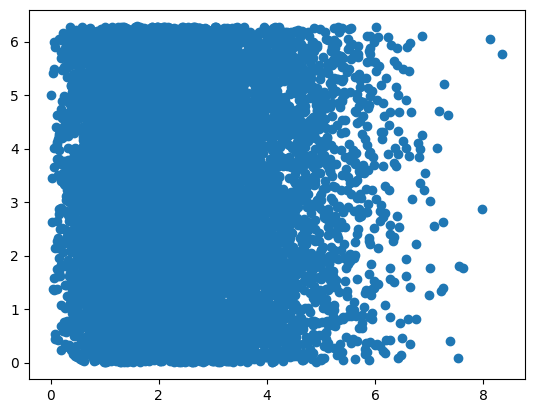

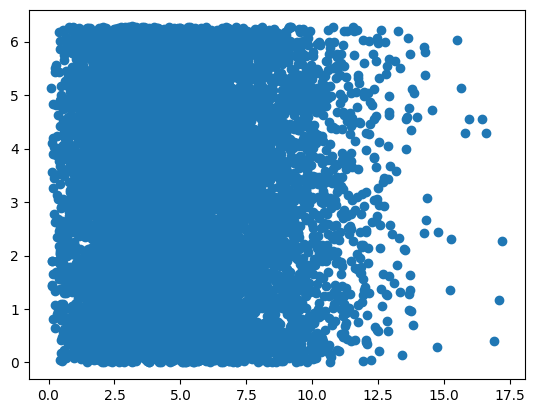

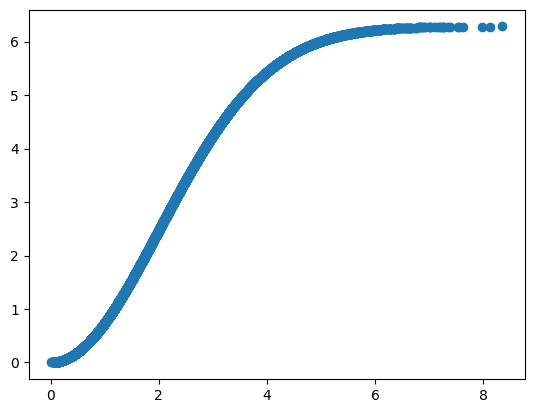

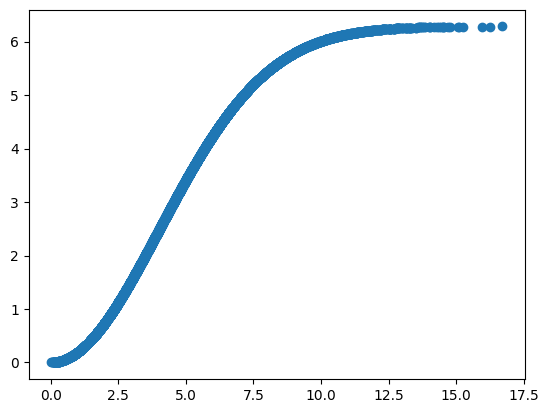

In [47]:
#2
N= 10000
sigmaR1 = 4
sigmaR2 = 16
u1 = np.random.rand(N)
u2 = np.random.rand(N)
u3 = np.random.rand(N)
u4 = np.random.rand(N)
theta1 = u3*2*np.pi
theta2 = u4*2*np.pi
thetaCorrélé = u1*2*np.pi
def _r(Fr, sigma):
    if (Fr <= 0):
        return 0
    else:
        return np.sqrt(-2 * sigma * np.log(-Fr + 1))

r1 = [_r(fr,sigmaR1) for fr in u1]
r2 = [_r(fr,sigmaR2) for fr in u2]
r1Corrélé = [_r(fr,sigmaR1) for fr in u1]
r2Corrélé = [_r(fr,sigmaR2) for fr in u1]
plt.scatter(r1,theta1)
plt.show()

plt.scatter(r2,theta2)
plt.show()


plt.scatter(r1Corrélé,thetaCorrélé)
plt.show()

plt.scatter(r2Corrélé,thetaCorrélé)
plt.show()

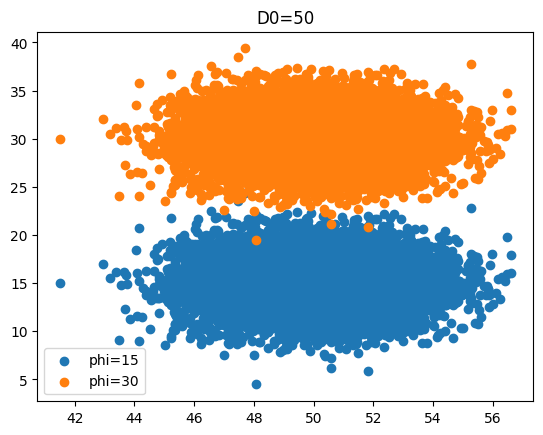

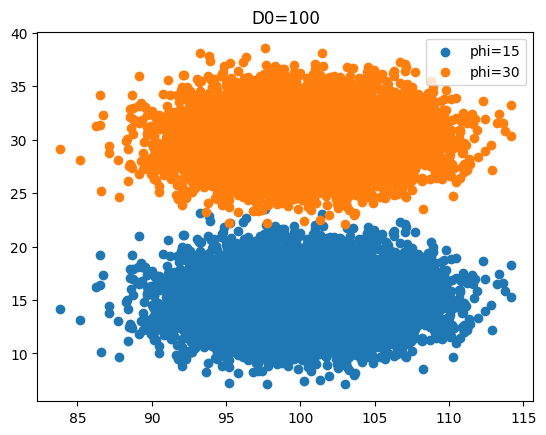

In [90]:
# 3
N = 10000
D01 = 50
D02 = 100
sigmaR1 = 4
sigmaR2 = 16
phi1 = 15*np.pi/180
phi2 = 30*np.pi/180

u1 = np.random.rand(N)
u2 = np.random.rand(N)
u3 = np.random.rand(N)
u4 = np.random.rand(N)
theta1 = u3*2*np.pi
theta2 = u4*2*np.pi


def monteCarlo(D0, theta, r, phi):
    Dx = D0*np.cos(phi) + r*np.cos(theta+phi)
    Dy = D0*np.sin(phi) + r*np.sin(theta+phi)
    # D = np.sqrt((D0 ** 2) + (2 * D0 * r * np.cos(theta)) + (r ** 2))
    D = np.sqrt(Dx**2 + Dy**2)
    # angle = phi + np.arctan(r*np.sin(theta)/(D0+r*np.cos(theta)))
    # angle = phi + r*np.sin(theta)
    angle = np.arctan(Dy/Dx)
    angle = 180*angle/np.pi
    return D, angle


D1 = []
D2 = []
D3 = []
D4 = []
angle1 = []
angle2 = []
angle3 = []
angle4 = []

for i in range(N):
    mc1 = monteCarlo(D01, theta[i], _r(u1[i], sigmaR1), phi1)
    mc2 = monteCarlo(D02, theta[i], _r(u2[i], sigmaR2), phi1)
    mc3 = monteCarlo(D01, theta[i], _r(u1[i], sigmaR1), phi2)
    mc4 = monteCarlo(D02, theta[i], _r(u2[i], sigmaR2), phi2)
    D1.append(mc1[0])
    angle1.append(mc1[1])
    D2.append(mc2[0])
    angle2.append(mc2[1])
    D3.append(mc3[0])
    angle3.append(mc3[1])
    D4.append(mc4[0])
    angle4.append(mc4[1])
plt.scatter(D1, angle1)
plt.scatter(D3, angle3)
plt.legend(["phi=15", "phi=30"])
plt.title("D0=50")
plt.show()
plt.scatter(D2, angle2)
plt.scatter(D4, angle4)
plt.title("D0=100")
plt.legend(["phi=15", "phi=30"])
plt.show()


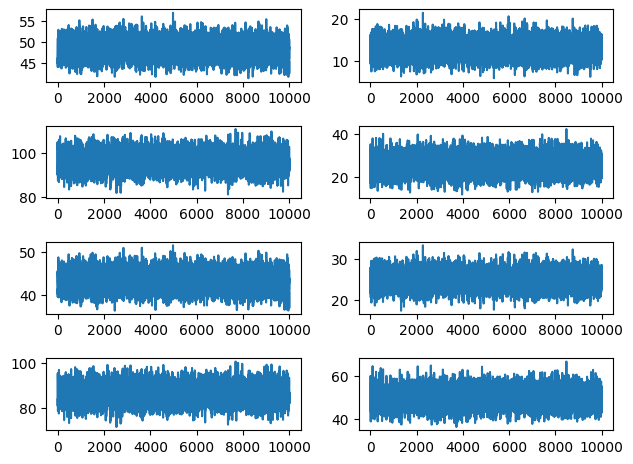

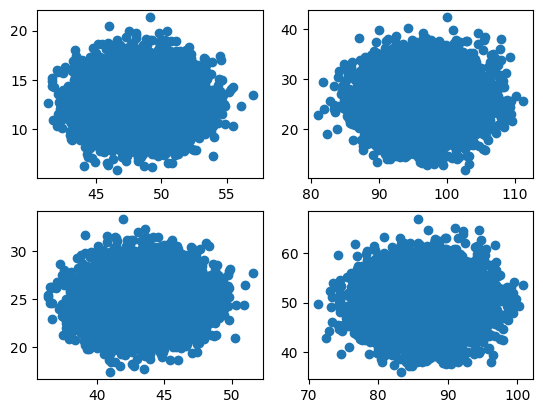

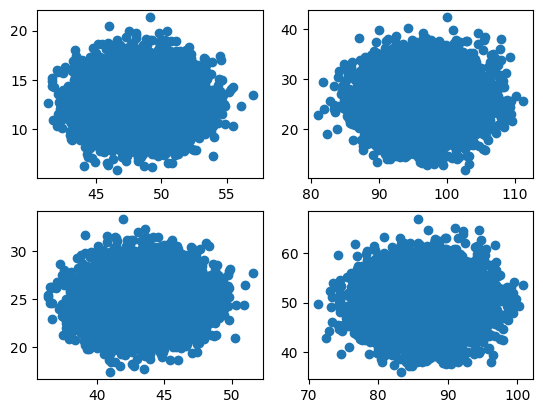

In [205]:
# 4
N = 10000
D01 = 50
D02 = 100
sigmaR1 = 4
sigmaR2 = 16
phi1 = 15*np.pi/180
phi2 = 30*np.pi/180

u1 = np.random.rand(N)
u2 = np.random.rand(N)
u3 = np.random.rand(N)
u4 = np.random.rand(N)
thetaCorrélé = u1*2*np.pi
theta1 = u3*2*np.pi
theta2 = u4*2*np.pi
Dx1 = []
Dx2 = []
Dx3 = []
Dx4 = []
Dy1 = []
Dy2 = []
Dy3 = []
Dy4 = []
Dx1Corrélé = []
Dx2Corrélé = []
Dx3Corrélé = []
Dx4Corrélé = []
Dy1Corrélé = []
Dy2Corrélé = []
Dy3Corrélé = []
Dy4Corrélé = []


def monteCarlo(D0, theta, r, phi):
    Dx = D0*np.cos(phi) + r*np.cos(theta+phi)
    Dy = D0*np.sin(phi) + r*np.sin(theta+phi)
    # D = np.sqrt((D0 ** 2) + (2 * D0 * r * np.cos(theta)) + (r ** 2))
    D = np.sqrt(Dx**2 + Dy**2)
    # angle = phi + np.arctan(r*np.sin(theta)/(D0+r*np.cos(theta)))
    # angle = phi + r*np.sin(theta)
    angle = np.arctan(Dy/Dx)
    angle = 180*angle/np.pi
    return D, angle, Dx, Dy


for i in range(N):
    mc1 = monteCarlo(D01, theta[i], _r(u1[i], sigmaR1), phi1)
    mc2 = monteCarlo(D02, theta[i], _r(u2[i], sigmaR2), phi1)
    mc3 = monteCarlo(D01, theta[i], _r(u1[i], sigmaR1), phi2)
    mc4 = monteCarlo(D02, theta[i], _r(u2[i], sigmaR2), phi2)
    mcCorrélé = monteCarlo(D01, thetaCorrélé[i], _r(u1[i], sigmaR1), phi1)
    mcCorrélé2 = monteCarlo(D01, thetaCorrélé[i], _r(u1[i], sigmaR1), phi2)
    mcCorrélé3 = monteCarlo(D02, thetaCorrélé[i], _r(u1[i], sigmaR2), phi1)
    mcCorrélé4 = monteCarlo(D02, thetaCorrélé[i], _r(u1[i], sigmaR1), phi2)
    Dx1.append(mc1[2])
    Dy1.append(mc1[3])
    Dx2.append(mc2[2])
    Dy2.append(mc2[3])
    Dx3.append(mc3[2])
    Dy3.append(mc3[3])
    Dx4.append(mc4[2])
    Dy4.append(mc4[3])
    
    Dx1Corrélé.append(mc1[2])
    Dy1Corrélé.append(mc1[3])
    Dx2Corrélé.append(mc2[2])
    Dy2Corrélé.append(mc2[3])
    Dx3Corrélé.append(mc3[2])
    Dy3Corrélé.append(mc3[3])
    Dx4Corrélé.append(mc4[2])
    Dy4Corrélé.append(mc4[3])
    

fig, axs = plt.subplots(4, 2)
fig.tight_layout()
axs[0, 0].plot(Dx1)
axs[0, 1].plot(Dy1)
axs[1, 0].plot(Dx2)
axs[1, 1].plot(Dy2)
axs[2, 0].plot(Dx3)
axs[2, 1].plot(Dy3)
axs[3, 0].plot(Dx4)
axs[3, 1].plot(Dy4)
plt.show()

fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(Dx1, Dy1)
axs[0, 1].scatter(Dx2, Dy2)
axs[1, 0].scatter(Dx3, Dy3)
axs[1, 1].scatter(Dx4, Dy4)
plt.show()
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(Dx1Corrélé, Dy1Corrélé)
axs[0, 1].scatter(Dx2Corrélé, Dy2Corrélé)
axs[1, 0].scatter(Dx3Corrélé, Dy3Corrélé)
axs[1, 1].scatter(Dx4Corrélé, Dy4Corrélé)
plt.show()

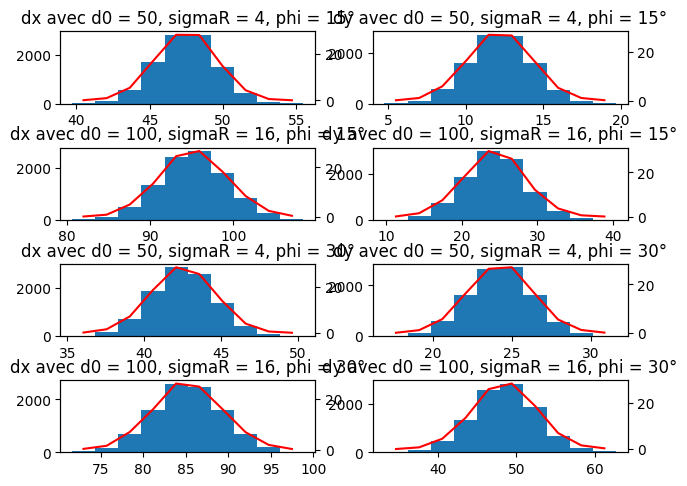

moyenne avec d0 = 50, sigmaR = 4, phi = 15° dx1 =  48.27307192124389
ecart-type avec d0 = 50, sigmaR = 4, phi = 15° dx1 =  2.0048585080269863
moyenne avec d0 = 50, sigmaR = 4, phi = 15° dy1 =  12.939410267139017
ecart-type avec d0 = 50, sigmaR = 4, phi = 15° dy1 =  2.0082234906599234
moyenne avec d0 = 100, sigmaR = 16, phi = 15° dx2 =  96.59118399447716
ecart-type avec d0 = 100, sigmaR = 16, phi = 15° dx2 =  3.998772766487876
moyenne avec d0 = 100, sigmaR = 16, phi = 15° dy2 =  25.872757200296604
ecart-type avec d0 = 100, sigmaR = 16, phi = 15° dy2 =  3.9879338722297697
moyenne avec d0 = 50, sigmaR = 4, phi = 30° dx3 =  43.279241073508466
ecart-type avec d0 = 50, sigmaR = 4, phi = 30° dx3 =  2.0090731924784886
moyenne avec d0 = 50, sigmaR = 4, phi = 30° dy3 =  24.99250093280116
ecart-type avec d0 = 50, sigmaR = 4, phi = 30° dy3 =  2.0040070191770325
moyenne avec d0 = 100, sigmaR = 16, phi = 30° dx4 =  86.60355689935466
ecart-type avec d0 = 100, sigmaR = 16, phi = 30° dx4 =  4.010097044

In [207]:
# 5
N = 10000
D01 = 50
D02 = 100
sigmaR1 = 4
sigmaR2 = 16
phi1 = 15*np.pi/180
phi2 = 30*np.pi/180

u1 = np.random.rand(N)
u2 = np.random.rand(N)
u3 = np.random.rand(N)
u4 = np.random.rand(N)
theta1 = u3*2*np.pi
theta2 = u4*2*np.pi
Dx1 = []
Dx2 = []
Dx3 = []
Dx4 = []
Dy1 = []
Dy2 = []
Dy3 = []
Dy4 = []


def monteCarlo(D0, theta, r, phi):
    Dx = D0*np.cos(phi) + r*np.cos(theta+phi)
    Dy = D0*np.sin(phi) + r*np.sin(theta+phi)
    # D = np.sqrt((D0 ** 2) + (2 * D0 * r * np.cos(theta)) + (r ** 2))
    D = np.sqrt(Dx**2 + Dy**2)
    # angle = phi + np.arctan(r*np.sin(theta)/(D0+r*np.cos(theta)))
    # angle = phi + r*np.sin(theta)
    angle = np.arctan(Dy/Dx)
    angle = 180*angle/np.pi
    return D, angle, Dx, Dy


for i in range(N):
    mc1 = monteCarlo(D01, theta[i], _r(u1[i], sigmaR1), phi1)
    mc2 = monteCarlo(D02, theta[i], _r(u2[i], sigmaR2), phi1)
    mc3 = monteCarlo(D01, theta[i], _r(u1[i], sigmaR1), phi2)
    mc4 = monteCarlo(D02, theta[i], _r(u2[i], sigmaR2), phi2)
    Dx1.append(mc1[2])
    Dy1.append(mc1[3])
    Dx2.append(mc2[2])
    Dy2.append(mc2[3])
    Dx3.append(mc3[2])
    Dy3.append(mc3[3])
    Dx4.append(mc4[2])
    Dy4.append(mc4[3])

counts1, bins1 = np.histogram(Dx1)
counts2, bins2 = np.histogram(Dy1)
counts3, bins3 = np.histogram(Dx2)
counts4, bins4 = np.histogram(Dy2)
counts5, bins5 = np.histogram(Dx3)
counts6, bins6 = np.histogram(Dy3)
counts7, bins7 = np.histogram(Dx4)
counts8, bins8 = np.histogram(Dy4)

fig, axs = plt.subplots(4, 2)
fig.tight_layout()
relativefreq1 = counts1/float(N)*100
axs[0][0].hist(Dx1,align="left",bins=bins1)
axstwin = axs[0][0].twinx()
axstwin.plot(bins1[:-1],relativefreq1,"r")
axs[0][0].set_title("dx avec d0 = 50, sigmaR = 4, phi = 15°")

relativefreq2 = counts2/float(N)*100
axs[0][1].hist(Dy1,align="left",bins=bins2)
axstwin = axs[0][1].twinx()
axstwin.plot(bins2[:-1],relativefreq2,"r")
axs[0][1].set_title("dy avec d0 = 50, sigmaR = 4, phi = 15°")

relativefreq3 = counts3/float(N)*100
axs[1][0].hist(Dx2,align="left",bins=bins3)
axstwin = axs[1][0].twinx()
axstwin.plot(bins3[:-1],relativefreq3,"r")
axs[1][0].set_title("dx avec d0 = 100, sigmaR = 16, phi = 15°")

relativefreq4 = counts4/float(N)*100
axs[1][1].hist(Dy2,align="left",bins=bins4)
axstwin = axs[1][1].twinx()
axstwin.plot(bins4[:-1],relativefreq4,"r")
axs[1][1].set_title("dy avec d0 = 100, sigmaR = 16, phi = 15°")

relativefreq5 = counts5/float(N)*100
axs[2][0].hist(Dx3,align="left",bins=bins5)
axstwin = axs[2][0].twinx()
axstwin.plot(bins5[:-1],relativefreq5,"r")
axs[2][0].set_title("dx avec d0 = 50, sigmaR = 4, phi = 30°")

relativefreq6 = counts6/float(N)*100
axs[2][1].hist(Dy3,align="left",bins=bins6)
axstwin = axs[2][1].twinx()
axstwin.plot(bins6[:-1],relativefreq6,"r")
axs[2][1].set_title("dy avec d0 = 50, sigmaR = 4, phi = 30°")

relativefreq7 = counts7/float(N)*100
axs[3][0].hist(Dx4,align="left",bins=bins7)
axstwin = axs[3][0].twinx()
axstwin.plot(bins7[:-1],relativefreq7,"r")
axs[3][0].set_title("dx avec d0 = 100, sigmaR = 16, phi = 30°")

relativefreq8 = counts8/float(N)*100
axs[3][1].hist(Dy4,align="left",bins=bins8)
axstwin = axs[3][1].twinx()
axstwin.plot(bins8[:-1],relativefreq8,"r")
axs[3][1].set_title("dy avec d0 = 100, sigmaR = 16, phi = 30°")

plt.show()
moyenne1 = np.mean(Dx1)
ecarttype1 = np.std(Dx1)
print("moyenne avec d0 = 50, sigmaR = 4, phi = 15° dx1 = ", moyenne1)
print("ecart-type avec d0 = 50, sigmaR = 4, phi = 15° dx1 = ", ecarttype1)

moyenne2 = np.mean(Dy1)
ecarttype2 = np.std(Dy1)
print("moyenne avec d0 = 50, sigmaR = 4, phi = 15° dy1 = ", moyenne2)
print("ecart-type avec d0 = 50, sigmaR = 4, phi = 15° dy1 = ", ecarttype2)

moyenne3 = np.mean(Dx2)
ecarttype3 = np.std(Dx2)
print("moyenne avec d0 = 100, sigmaR = 16, phi = 15° dx2 = ", moyenne3)
print("ecart-type avec d0 = 100, sigmaR = 16, phi = 15° dx2 = ", ecarttype3)

moyenne4 = np.mean(Dy2)
ecarttype4 = np.std(Dy2)
print("moyenne avec d0 = 100, sigmaR = 16, phi = 15° dy2 = ", moyenne4)
print("ecart-type avec d0 = 100, sigmaR = 16, phi = 15° dy2 = ", ecarttype4)

moyenne5 = np.mean(Dx3)
ecarttype5 = np.std(Dx3)
print("moyenne avec d0 = 50, sigmaR = 4, phi = 30° dx3 = ", moyenne5)
print("ecart-type avec d0 = 50, sigmaR = 4, phi = 30° dx3 = ", ecarttype5)

moyenne6 = np.mean(Dy3)
ecarttype6 = np.std(Dy3)
print("moyenne avec d0 = 50, sigmaR = 4, phi = 30° dy3 = ", moyenne6)
print("ecart-type avec d0 = 50, sigmaR = 4, phi = 30° dy3 = ", ecarttype6)

moyenne7 = np.mean(Dx4)
ecarttype7 = np.std(Dx4)
print("moyenne avec d0 = 100, sigmaR = 16, phi = 30° dx4 = ", moyenne7)
print("ecart-type avec d0 = 100, sigmaR = 16, phi = 30° dx4 = ", ecarttype7)

moyenne8 = np.mean(Dy4)
ecarttype8 = np.std(Dy4)
print("moyenne avec d0 = 100, sigmaR = 16, phi = 30° dy4 = ", moyenne8)
print("ecart-type avec d0 = 100, sigmaR = 16, phi = 30° dy4 = ", ecarttype8)

In [264]:
#8
N = 10000
D01 = 50
D02 = 100
sigmaR1 = 4
sigmaR2 = 16
phi1 = 15*np.pi/180
phi2 = 30*np.pi/180

u1 = np.random.rand(N)
u2 = np.random.rand(N)
u3 = np.random.rand(N)
u4 = np.random.rand(N)
theta1 = u3*2*np.pi
theta2 = u4*2*np.pi
Dx1 = []
Dx2 = []
Dx3 = []
Dx4 = []
Dy1 = []
Dy2 = []
Dy3 = []
Dy4 = []


def monteCarlo(D0, theta, r, phi):
    Dx = D0*np.cos(phi) + r*np.cos(theta+phi)
    Dy = D0*np.sin(phi) + r*np.sin(theta+phi)
    # D = np.sqrt((D0 ** 2) + (2 * D0 * r * np.cos(theta)) + (r ** 2))
    D = np.sqrt(Dx**2 + Dy**2)
    # angle = phi + np.arctan(r*np.sin(theta)/(D0+r*np.cos(theta)))
    # angle = phi + r*np.sin(theta)
    angle = np.arctan(Dy/Dx)
    angle = 180*angle/np.pi
    return D, angle, Dx, Dy


for i in range(N):
    mc1 = monteCarlo(D01, theta[i], _r(u1[i], sigmaR1), phi1)
    mc2 = monteCarlo(D02, theta[i], _r(u2[i], sigmaR2), phi1)
    mc3 = monteCarlo(D01, theta[i], _r(u1[i], sigmaR1), phi2)
    mc4 = monteCarlo(D02, theta[i], _r(u2[i], sigmaR2), phi2)
    Dx1.append(mc1[2])
    Dy1.append(mc1[3])
    Dx2.append(mc2[2])
    Dy2.append(mc2[3])
    Dx3.append(mc3[2])
    Dy3.append(mc3[3])
    Dx4.append(mc4[2])
    Dy4.append(mc4[3])


cov1 = np.cov(Dx1,Dy1)
cov2 = np.cov(Dx2,Dy2)
cov3 = np.cov(Dx3,Dy3)
cov4 = np.cov(Dx4,Dy4)
print( cov1)
#9
vConf = 0.95
s = 5.991
val1, vec1 = np.linalg.eig(cov1)
val2, vec2 = np.linalg.eig(cov2)
val3, vec3 = np.linalg.eig(cov3)
val4, vec4 = np.linalg.eig(cov4)

maj1 = 2*np.sqrt(val1[0]*s)
min1 = 2*np.sqrt(val1[1]*s)
angle1 = 180*angle1/np.pi
maj2 = 2*np.sqrt(val2[0]*s)
min2 = 2*np.sqrt(val2[1]*s)
angle2 = 180*angle2/np.pi
maj3 = 2*np.sqrt(val3[0]*s)
min3 = 2*np.sqrt(val3[1]*s)
angle3 = 180*angle3/np.pi
maj4 = 2*np.sqrt(val4[0]*s)
min4 = 2*np.sqrt(val4[1]*s)


[[ 4.01776848e+00 -8.62166452e-05]
 [-8.62166452e-05  3.93270539e+00]]
